In [13]:
%matplotlib inline

import optuna
import seaborn as sns
import matplotlib.pyplot as plt

best val: 0.4321


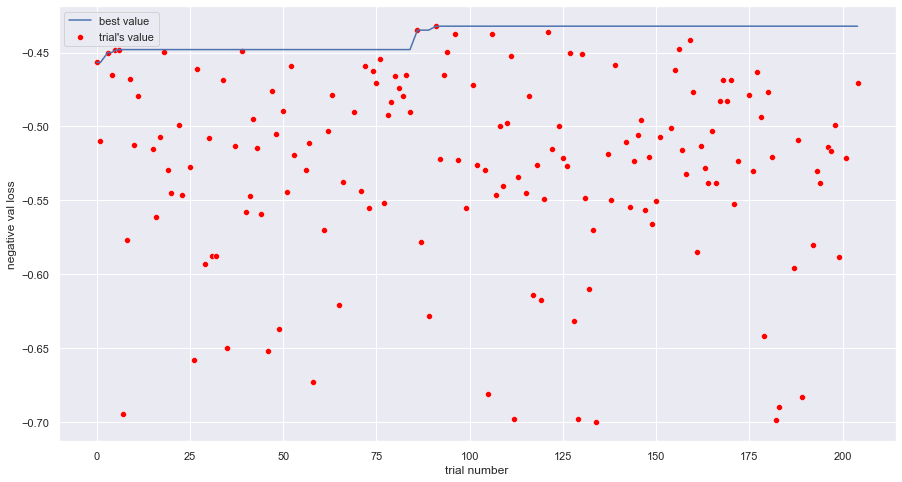

In [14]:
# loads study
study_name = "bayesian_opt_v2"
storage_name = f"sqlite:///C:/Users/Noaja/Downloads/msci_project/tth-ML-project/models/{study_name}.db"
study = optuna.load_study(study_name=study_name, storage=storage_name)

# converts study to DataFrame
df = study.trials_dataframe(attrs=("value", "params", "state"))
df.dropna(inplace=True)

# Removes loss values above threshold
threshold = .7
df['value'] = -abs(df['value'])
df = df[abs(df['value']) < threshold]

sns.set(rc = {'figure.figsize':(15,8)})
print('best val:', -round(df['value'].max(),4))

a = sns.lineplot(x=df.index, y=df['value'].cummax())
sns.scatterplot(x=df.index, y=df['value'], color='red')

a.set_xlabel('trial number')
a.set_ylabel('negative val loss')
a.legend(['best value', "trial's value"])

plt.show()

In [15]:
optuna.visualization.plot_param_importances(study)

In [16]:
optuna.visualization.plot_edf(study)

In [17]:
optuna.visualization.plot_parallel_coordinate(study)

In [18]:
optuna.visualization.plot_slice(study)

In [19]:
round(df.sort_values(by=['value'], ascending=False), 4).head(20)

,value,params_batch_size,params_dropout,params_lr,params_lstm_layer2,params_lstm_units,params_merged_units,params_num_merged_layers,params_output_units,params_redropout,state
91,-0.4321,128,0.2810,0.0033,True,140,300,1,179,0.0794,COMPLETE
86,-0.4348,64,0.3014,0.0046,True,140,380,1,190,0.0230,COMPLETE
121,-0.4358,16,0.0915,0.0002,True,140,300,1,179,0.4716,COMPLETE
106,-0.4373,128,0.2471,0.0061,True,40,240,1,194,0.0004,COMPLETE
96,-0.4375,128,0.2376,0.0015,True,60,320,1,188,0.0792,COMPLETE
159,-0.4417,128,0.1139,0.0032,True,180,220,1,120,0.1451,COMPLETE
156,-0.4474,16,0.0828,0.0040,True,180,260,1,168,0.4564,COMPLETE
6,-0.4480,16,0.0839,0.0002,True,60,340,4,48,0.1622,COMPLETE
5,-0.4484,16,0.1124,0.0077,True,240,160,1,14,0.4623,COMPLETE
39,-0.4487,128,0.2613,0.0015,True,360,340,3,158,0.0534,COMPLETE
